<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_CHNS_pexam_pub_12_U24BU23U36_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.8/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


In [7]:
# where your file is located
FILE_LOCATION1 = '/content/drive/My Drive/pattern_realdata/CHNS_pexam_pub_12_U24BU23U36_new1.csv'
df1 = pd.read_csv(FILE_LOCATION1)
df1

,Unnamed: 0,x1,x2,y,y_hat,e
0,2,35.0,3.0,62.0,59.820065,2.179935
1,18,7.0,3.0,60.0,46.064942,13.935058
2,22,10.0,3.0,54.0,47.538705,6.461295
3,23,30.0,2.0,60.0,58.128899,1.871101
4,505,12.0,4.0,70.0,47.756107,22.243893
...,...,...,...,...,...,...
115,113529,11.0,5.0,65.0,46.499747,18.500253
116,117706,4.0,1.0,57.0,46.121391,10.878609
117,122928,11.0,1.0,58.0,49.560172,8.439828
118,124292,3.0,1.0,73.0,45.630136,27.369864


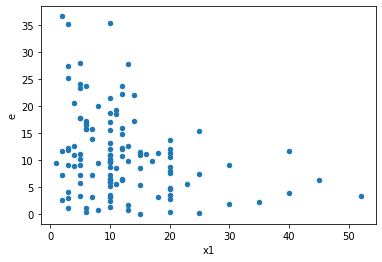

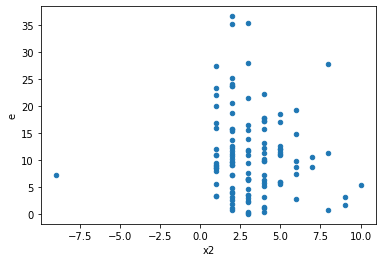

In [8]:
df1.plot(x ='x1', y='e', kind = 'scatter')
df1.plot(x ='x2', y='e', kind = 'scatter')

In [9]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = df1[["y_hat"]]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [10]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})
kmean_clusters.head()

,clusters
0,1
1,0
2,0
3,1
4,0


In [11]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([df1, kmean_clusters], axis=1)
data_clusters

,Unnamed: 0,x1,x2,y,y_hat,e,clusters
0,2,35.0,3.0,62.0,59.820065,2.179935,1
1,18,7.0,3.0,60.0,46.064942,13.935058,0
2,22,10.0,3.0,54.0,47.538705,6.461295,0
3,23,30.0,2.0,60.0,58.128899,1.871101,1
4,505,12.0,4.0,70.0,47.756107,22.243893,0
...,...,...,...,...,...,...,...
115,113529,11.0,5.0,65.0,46.499747,18.500253,0
116,117706,4.0,1.0,57.0,46.121391,10.878609,0
117,122928,11.0,1.0,58.0,49.560172,8.439828,0
118,124292,3.0,1.0,73.0,45.630136,27.369864,0


In [12]:
# กลุ่มที่ 1
data_cluster0 = data_clusters[data_clusters.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1', 'x2']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
DF1

100.0

In [14]:
SSE1

6125.922466280141

In [15]:
MSE1

61.25922466280141

In [16]:
# กลุ่มที่ 2
data_cluster1 = data_clusters[data_clusters.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1', 'x2']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

In [17]:
DF2

16.0

In [18]:
SSE2

276.3516673194158

In [19]:
MSE2

17.271979207463488

In [20]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

0.2819490338399858

In [21]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [22]:
two_tailed

1.9939904293009774

In [23]:
p_greater*2

0.006009570699022572

In [24]:
p_less

0.9969952146504887

###### The two-tailed p-value equals: 0.00601

###### p( x < 0.2819 ) = 0.003005
###### p( x > 0.2819 ) = 0.997
###### p( x < 0.2819 ) + p( x >2.4982) = 0.00601
###### Since p-value ≤ α, H0 is rejected. (0.00601 ≤ 0.01)

https://www.statskingdom.com/p_value.html

In [25]:
Significance = 0.01
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity


In [26]:
Significance = 0.05
if (p_greater*2) < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity
